# Overview

This workbook consist of two parts; a customer segmentation analysis and a customer life time value prediction. 
A customer segmentation analysis is crucial for business in order to identify and understand their customers needs and behaviors. If Olist wants to take direct actions in order to increase the revenue of customers then it needs to take different actions based on the different needs the customers might have. 


## Customer segmentation

In this report, the Recency-Frequency-Monetary (RFM) - clustering method has been chosen. The RFM method is used to analyse the value of a customer by the following three dimensions :

 - Recency: How recently did the customer purchase?  
 - Frequency: How often do they purchase? 
 - Monetary: How much do they spend? 
 
Each customer will get a combined RFM score.

In [13]:
# Import
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

dirpath = '../data/'

### Import of data 

The workbook will focus on the customer part of the OLIST dataset. Therefore, only the following datasets are joined:

- olist_customers_dataset
- olist_order_payments_dataset
- olist_orders_dataset

These are joined by the left-join operation and dataformat is set. 

In [14]:
# Load data
customers = pd.read_csv(dirpath+"olist_customers_dataset.csv")
order_payments = pd.read_csv(dirpath+"olist_order_payments_dataset.csv")
orders = pd.read_csv(dirpath+"olist_orders_dataset.csv")

# Join
customer_order = customers.merge(orders, on='customer_id', how='left')
order_payments = order_payments.groupby('order_id').sum().reset_index()[['order_id','payment_value']]
cop = customer_order.merge(order_payments, on='order_id', how='left')

# clean and format
cop['order_purchase_timestamp'] = pd.to_datetime(cop['order_purchase_timestamp'])
cop = cop[cop['order_status']!='canceled']

cop.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25


### KPIs and Metrics

In order to measure Olist business performance, a number of KPIs can be defined. The KPIs enables the team to measure the performance of their strategy and indicates poor performing areas of the business.

The following KPIs have been defined as important for Olist: 

- Monthly revenue 
- Monthy growth rate
- Number of active customers each month
- Number of returning customers each month/quarter


In the following section, the above KPIs will be calculated and presented. 

In [15]:
#Monthly revenue
cop['PurchaseMonth'] = cop['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

cop_MonthlyRevenue  = cop.groupby(['PurchaseMonth'])['payment_value'].sum().reset_index()

cop_MonthlyRevenue


,PurchaseMonth,payment_value
0,201609,136.23
1,201610,53915.50
2,201612,19.62
3,201701,138119.76
4,201702,289081.01
5,201703,442406.37
6,201704,409846.01
7,201705,588529.96
8,201706,507302.62
9,201707,585331.36


In [16]:
#Finding the quarterly revenue and plotting that (fewer datapoint to visualise)
cop['quarter'] = pd.PeriodIndex(cop.order_purchase_timestamp, freq='Q')

cop_revenue  = cop.groupby(['quarter'])['payment_value'].sum().reset_index()


cop_revenue

,quarter,payment_value
0,2016Q3,136.23
1,2016Q4,53935.12
2,2017Q1,869607.14
3,2017Q2,1505678.59
4,2017Q3,1976337.10
5,2017Q4,2835290.94
6,2018Q1,3250497.95
7,2018Q2,3328040.12
8,2018Q3,2046093.33


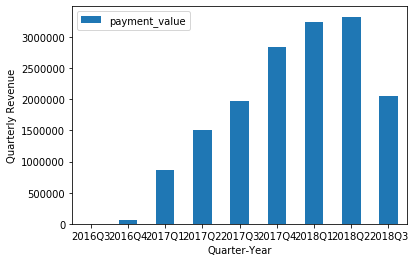

In [17]:
ax = cop_revenue.plot.bar(x='quarter', y='payment_value', rot=0)
plt.xlabel('Quarter-Year')
plt.ylabel('Quarterly Revenue')
plt.show()

The quarterly revenue has been growing throughout the period except in the lastest quarter. 
Below the growth rate is calculated by calculating the difference between the previous month and current month.

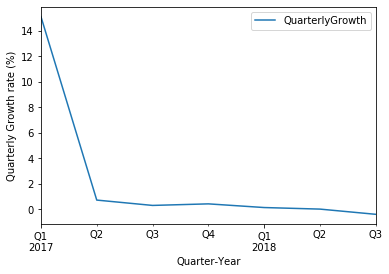

In [18]:
#calculating the quarterly growthrate and plotting it

cop_revenue['QuarterlyGrowth'] = cop_revenue['payment_value'].pct_change()


cop_revenue[2:].plot(x='quarter',y='QuarterlyGrowth')
plt.xlabel('Quarter-Year')
plt.ylabel('Quarterly Growth rate (%)')
plt.show()

In [19]:
cop_revenue['QuarterlyGrowth']


0           NaN
1    394.912207
2     15.123208
3      0.731447
4      0.312589
5      0.434619
6      0.146442
7      0.023855
8     -0.385196
Name: QuarterlyGrowth, dtype: float64

The growth rate is declining for Olist throughout the observed period.

In [20]:
# Distribution of how many times customers are returning to buy at Olist
customer_order.groupby('customer_unique_id').size().value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
dtype: int64

In [42]:
#number of non-returning customers in the dataset
(93099/customer_order.groupby('customer_unique_id').size().count())*100

96.88124375624375

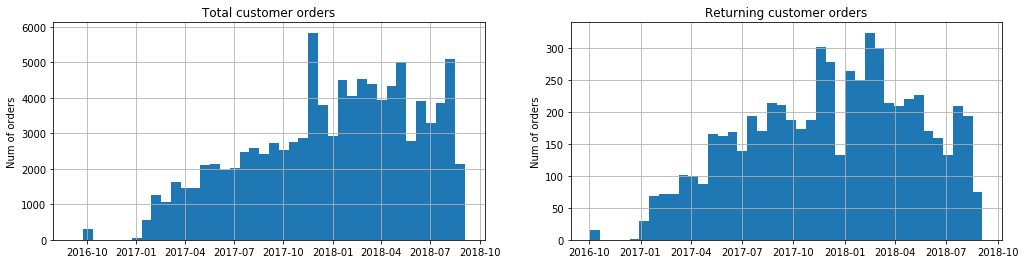

In [21]:
# The total customer order per month  and the amount of returning orders are visualised in the two plots below. 

plt.figure(figsize=(17, 4))
    
plt.subplot(1, 2, 1)
plt.title('Total customer orders')
plt.ylabel('Num of orders')
cop.order_purchase_timestamp.hist(bins=40)

plt.subplot(1, 2, 2)
plt.ylabel('Num of orders')
plt.title('Returning customer orders')
unique_id = cop.groupby('customer_unique_id').count()
later_purchase = cop[cop.customer_unique_id.isin(list(unique_id[unique_id.customer_id > 1].index))]
later_purchase.order_purchase_timestamp.hist(bins=40)
plt.show()

### Segmentation
The three parts of RFM is calculated now. The data is grouped by the unique customer id.
Recency is calculated with the difference between the lastest purchasing date in the data set subtracted with the purchase date of the observation.
Frequency is calculated by counting the amount of purchase timestamps each customer have. 
Revenue is calculated by summing each customer's payment_value. 


In [22]:
# Recency
df_recency = cop.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_recency.columns = ['customer_unique_id','last_purchase_date']
df_recency['Recency'] = (df_recency['last_purchase_date'].max() - df_recency['last_purchase_date']).dt.days
df_recency = df_recency[['customer_unique_id','Recency']]

# Frequency
df_frequency = cop.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','Frequency']

# Revenue
df_revenue = cop.groupby('customer_unique_id').payment_value.sum().reset_index()
df_revenue.columns = ['customer_unique_id','Revenue']

df = pd.DataFrame(cop['customer_unique_id'].unique())
df.columns = ['customer_unique_id']

We are going to apply K-means clustering to assign a score for each dimension in RFM. K-means require that we specify K clusters. This can be done from the Elbow method which tells us the optimal number of clusters.

First we define a function named plot_cluster which creates a for loop and calculate the a kmeans clustering for 
$K=\{1..10\}$. The function is called below and shows the optimal number of clusters is 4 for 'Recency'. For simplicity, it is assumed that the same number of optimal clusters applies to 'Frequency' and 'Monetary'.


In [23]:
def plot_cluster(data, name):
    sse={}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        sse[k] = kmeans.inertia_ 
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.title('Optimal number of clusters via Elbow of: ' + name)
    plt.xlabel("Number of cluster")
    plt.ylabel("Inertia")
    plt.show()

In [24]:
# Helper functions
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Now the K-mean is performed with 4 clusters for each of the three dimensions. A new dataframe is defined where the values for each of the dimension is paried with the belonging unique customer id.

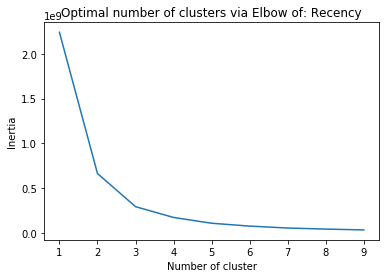

In [25]:
sort_orders = [False, True, True]
names = ['Recency','Frequency','Revenue']
dfs = [df_recency, df_frequency, df_revenue]

for i in range(len(['Recency','Frequency','Revenue'])):
    df = pd.merge(df, dfs[i], on='customer_unique_id')
    kmeans = KMeans(n_clusters=4)
    
    if names[i] == "Recency":
        plot_cluster(df[[names[i]]], names[i])
        
    kmeans.fit(df[[names[i]]])
    df['cluster_' + names[i]] = kmeans.predict(df[[names[i]]])
    df = order_cluster('cluster_' + names[i], names[i], df, sort_orders[i])
    
#df['OverallScore'] = df['cluster_Recency'] + df['cluster_Frequency'] + df['cluster_Revenue']

The overall score is now calculated by adding the three dimensions together.

In [26]:
df['OverallScore'] = df['cluster_Recency'] + df['cluster_Frequency'] + df['cluster_Revenue']
df['OverallScore'].unique()

array([0, 2, 3, 1, 4, 5, 6, 7, 8])

Now the final table is made where there is grouped by OverallScore by taking the mean value for the three dimensions.
Furthermore, a count columns is added to see the distribution of customers for each score.

In [27]:
overview = df.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()
overview['Count'] = df.groupby('OverallScore')['customer_unique_id'].count()
overview

,Recency,Frequency,Revenue,Count
OverallScore,,,,
0,488.059977,1.000000,91.234636,13255
1,341.708963,1.008578,120.366498,22382
2,217.242029,1.019169,142.400326,26501
3,101.689841,1.028977,167.217497,25848
4,97.564478,1.147306,402.046889,5940
5,88.387240,1.439169,780.287411,1348
6,77.028689,1.840164,1533.397623,244
7,104.666667,3.545455,1140.622424,33
8,52.888889,6.666667,1610.453333,9


The segments are divided into three categories: 

- Low Value: 0
- Mid Value: 1,2,3
- High Value: 4,5,6,7,8



In [36]:
df['Segment'] = 'Low-Value'
df.loc[df['OverallScore']>1,'Segment'] = 'Mid-Value' 
df.loc[df['OverallScore']>3,'Segment'] = 'High-Value' 


Now the segments are distributed on a scatter plot below.


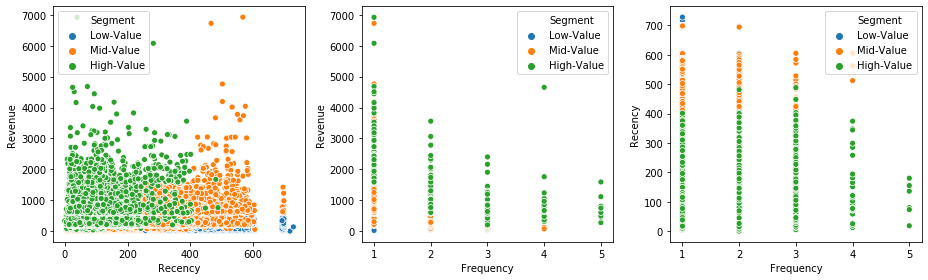

In [37]:
plot = df[(df['Revenue']<7000) & (df['Frequency']<6)]

plt.figure(figsize=(13, 4))
    
ax0_names = ['Recency','Frequency','Frequency']
ax1_names = ['Revenue','Revenue','Recency']

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(ax0_names[i], ax1_names[i], hue='Segment', data=plot)

plt.tight_layout()
plt.show()

The high-value customers and mid-value customers are quite seperated when looking at the three scatterplots. However, it seems like the low-value customers are very close to the mid-value customers. By taking a look at the scatter plot with Revenue and Recency, it can be seen that that the high and mid-value customers are seperated but the low-value customers seems to lie around the mid-value.
Furthermore, it is seen that for both of the frequency plots, the data lies on vertical lines which is due to frequency is an integer number ranging from 1 to 5. Again, the low-value customers are hard to seperate from the other categories in both of the plots. 

# Customer Lifetime Value

Now we know who our best customers are from our segmentation. Therefore, it is relevant to dive deeper into our customers and get an idea of how much value they are creating for Olist. 
Therefore we can use use the method, Customer Lifetime Value (LCV), which is  a prediction of the net profit attributed to a future relationship with a customer.
In this part of the workbook, we will go through the following path:

- Define a timeframe for LCV
- Identify relevant features used for modelling 
- Calculate the LCV to train the models
- Build a baseline model, and suggest more advanced model
- Evaluate the proposed models




Note: Since we do not have the net profit for each customer available in the data, we will use the revenue instead.






### Defining the timeframe for LCV and relevant features
We have chosen to predict the LCV for the next 8 months so the period will be from 01/10/2017 - 01/06/2018. 

We can use the RFM clustering for each customer as a feature to our prediction model. Therefore, we take 10 months of data to calculate the RFM and use it to predict the next 8 month LCV. The 10 months will stretch from 01/01/2017-01/10/2017. 

First, we will split the dataframe into two dataframes and append the RFM scores after.

In [44]:
from datetime import datetime, timedelta, date
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [45]:
# Create 12m and 6m dataframes
tx_12m = cop[(cop.order_purchase_timestamp < pd.Timestamp(2017,10,1)) & (cop.order_purchase_timestamp >= pd.Timestamp(2017,1,1))].reset_index(drop=True)
tx_6m = cop[(cop.order_purchase_timestamp >= pd.Timestamp(2017,10,1)) & (cop.order_purchase_timestamp < pd.Timestamp(2018,6,1))].reset_index(drop=True)

Calculating the RFM scores with the code from the segmentation for the 10-month period.

In [51]:
# Recency 12m
df_recency = tx_12m.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_recency.columns = ['customer_unique_id','last_purchase_date']
df_recency['Recency'] = (df_recency['last_purchase_date'].max() - df_recency['last_purchase_date']).dt.days
df_recency = df_recency[['customer_unique_id','Recency']]

# Frequency 12m
df_frequency = tx_12m.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','Frequency']

# Revenue 12m
df_revenue = tx_12m.groupby('customer_unique_id').payment_value.sum().reset_index()
df_revenue.columns = ['customer_unique_id','Revenue']

df_12m = pd.DataFrame(tx_12m['customer_unique_id'].unique())
df_12m.columns = ['customer_unique_id']

sort_orders = [False, True, True]
names = ['Recency','Frequency','Revenue']
dfs = [df_recency, df_frequency, df_revenue]

for i in range(len(['Recency','Frequency','Revenue'])):
    df_12m = pd.merge(df_12m, dfs[i], on='customer_unique_id')
    kmeans = KMeans(n_clusters=4)        
    kmeans.fit(df_12m[[names[i]]])
    df_12m['cluster_' + names[i]] = kmeans.predict(df_12m[[names[i]]])
    df_12m = order_cluster('cluster_' + names[i], names[i], df_12m, sort_orders[i])
    
df_12m['OverallScore'] = df_12m['cluster_Recency'] + df_12m['cluster_Frequency'] + df_12m['cluster_Revenue']

In [52]:
df_12m['Segment'] = 'Low-Value'
df_12m.loc[df['OverallScore']>1,'Segment'] = 'Mid-Value' 
df_12m.loc[df['OverallScore']>3,'Segment'] = 'High-Value' 

plot = df_12m[(df_12m['Revenue']<7000) & (df_12m['Frequency']<6)]

### 8 month LCV

Now the 8 month LCV is calculated for each customer. We use the 8 month dataframe and groupby the unique customers and sum the value of their payments. The distribution for revenue is shown with a histogram. 
The histogram shows, as expected, that most of the customers are creating a low amount of revenue and it is a very small part of the customers that creating a total revenue above 300 BRL. 

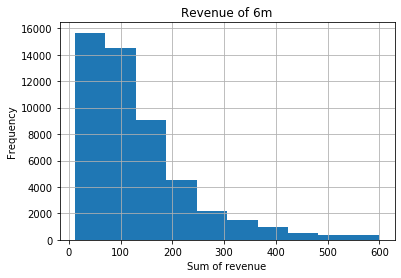

In [53]:
# Calculate revenue and create a new dataframe for it
tx_user_6m = tx_6m.groupby('customer_unique_id')['payment_value'].sum().reset_index()
tx_user_6m.columns = ['customer_unique_id','m6_Revenue']

# Plotting
tx_user_6m['m6_Revenue'][tx_user_6m['m6_Revenue']<600].hist()
plt.ylabel('Frequency')
plt.xlabel('Sum of revenue')
plt.title('Revenue of 6m')
plt.show()

Now the target variabel,LCV, has been calculated for the 8-month dataset and the RFM features for the 10-month dataset. The two dataframes will now be merged so the correlation between the LCV and the features can be investigated. The LCV is continous variabel now which will be transformed to a categorial variabel by predicting three groups based on the LCV value. K-Means is again used for this segmentation.

In [54]:
tx_merge = pd.merge(df_12m, tx_user_6m, on='customer_unique_id', how='left')
#tx_merge = tx_merge.fillna(0)

tx_merge.head()
#insert scatter plot her af RFM score vs 6m LTV

,customer_unique_id,Recency,cluster_Recency,Frequency,cluster_Frequency,Revenue,cluster_Revenue,OverallScore,Segment,m6_Revenue
0,861eff4711a542e4b93843c6dd7febb0,137,1,1,0,146.87,0,1,Low-Value,NaN
1,7f3a72e8f988c6e735ba118d54f47458,142,1,1,0,102.03,0,1,Low-Value,NaN
2,4390ddbb6276a66ff1736a6710205dca,169,1,1,0,94.63,0,1,Low-Value,NaN
3,2e6a42a9b5cbb0da62988694f18ee295,138,1,1,0,47.59,0,1,Low-Value,NaN
4,fd2d5fdb84e65fa6b54b98b0e2df5645,131,1,1,0,80.57,0,1,Low-Value,NaN


In [55]:
#remove outliers
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]

#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,388.0,93.216366,43.829355,15.89,55.3075,88.655,130.8775,180.51
1,100.0,273.550100,63.001244,184.73,220.8700,267.305,314.3375,435.95
2,22.0,610.989091,98.363437,453.80,543.2925,616.970,665.2375,785.24


Above the three LTV clusters are described. The problem with non-occuring customers are clearly seen here where the combined count of the clusters are 510. This is much to little data to use for a prediction model in order for it to create results which can be actually used in a business setting. However, we will still apply some basic predition models and a more advanced one. The results from these models might be useless but the concept of tracking the LTV for a customer and predicting a new customer's LCV can create a lot of value for Olist in the future. 

In [56]:
tx_cluster.head()

,customer_unique_id,Recency,cluster_Recency,Frequency,cluster_Frequency,Revenue,cluster_Revenue,OverallScore,Segment,m6_Revenue,LTVCluster
0,18e3d276253780b44b5b7bf83f6785ec,150,1,1,0,96.88,0,1,Low-Value,71.97,0
1,49d1599dd80dedc213037342bbe43fd7,120,1,1,0,40.77,0,1,Low-Value,77.80,0
2,2b952792a20f6076f6e7a9c6a27ade02,117,1,1,0,47.54,0,1,Low-Value,82.60,0
3,f7d2fc6f0a2778f53d2a6bfc27bd0e8c,137,1,1,0,190.33,0,1,Low-Value,179.86,0
4,cb4253d36367737b6baa4f8ca58fac62,108,1,1,0,83.14,0,1,Low-Value,59.66,0


The categorial variables are converted into dummy/indicator variables using pandas get_dummies()-function. 
Furthermore, the correlation between the features and the target variables are shown in a list.

In [57]:
#convert categorical columns to numerical
tx_class = pd.get_dummies(tx_cluster, columns=['Segment'])

In [58]:
#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster           1.000000
m6_Revenue           0.903187
cluster_Revenue      0.233570
Revenue              0.232252
cluster_Frequency    0.181156
Frequency            0.171613
OverallScore         0.147613
Segment_Mid-Value    0.097847
cluster_Recency      0.045234
Recency             -0.048607
Segment_Low-Value   -0.097847
Name: LTVCluster, dtype: float64

Before we fit the prediction model, our data is scaled using the MinMaxScaler from sklearn. After the data is splitted into a test and train set. 

In [59]:
from sklearn.preprocessing import MinMaxScaler

#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['customer_unique_id','LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=56)

### Dummy baseline

Having a high class imbalance we first create a baseline "dummy" classifier to later compare with a more advanced model.

In [60]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

clf = DummyClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        55
           1       0.14      0.12      0.13        16
           2       0.50      0.17      0.25         6

    accuracy                           0.60        77
   macro avg       0.45      0.36      0.37        77
weighted avg       0.57      0.60      0.58        77



The dummy classifier performs well on the first cluster 0 but are struggling alot with cluster 1 and a bit with cluster 2. 

### Logistic regression 

A logistic regression model is also tried on the dataset. 

In [61]:
#class_weight='balanced' er til, skal vendes med Stannislav 
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial',class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.28      0.44      0.34        16
           2       0.25      0.67      0.36         6

    accuracy                           0.49        77
   macro avg       0.43      0.53      0.43        77
weighted avg       0.61      0.49      0.52        77



The overall performance level is similar to the dummy classifier. The Precision is twice as high for cluster 1 in logistic regression compared to the dummy classifier. However, the precision for cluster 2 is at the same time half as low compared to the dummy. 

In [62]:
clf.coef_

array([[ 0.58808132,  0.23549216, -0.21882155, -0.33255199, -1.38009096,
        -0.59043405, -0.21029251, -0.0119123 ,  0.01167866],
       [ 0.81625171, -0.10422958,  0.81272001,  1.30622988, -0.85634008,
         0.41354052,  0.63329742,  0.18885057, -0.18949584],
       [-1.40433303, -0.13126258, -0.59389847, -0.97367789,  2.23643104,
         0.17689353, -0.42300491, -0.17693827,  0.17781718]])

### ANN Classifier

With two simple models implemented, a more advanced model is proposed. The model is a feed-forward neural network with 2 layers with 20 hidden units in each layer. Relu is used as the non-linear activation function in both layers. A softmax function is applied to the outputlayer and categorical crossentropy is used as loss function. 
The model is trained with 100 epochs. 

In [65]:
# multi-class classification with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

train_cat_y = np_utils.to_categorical(y_train)

# define baseline model
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.summary()
    
model.fit(X_train, train_cat_y, epochs = 100)    
y_pred = model.predict_classes(X_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 63        
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
433/433 [==============================] - 0s 225us/step - loss: 0.9354 - accuracy: 0.6189
Epoch 2/100
433/433 [==============================] - 0s 39us/step - loss: 0.8131 - accuracy: 0.7691
Epoch 3/100
433/433 [==============================] - 0s 39us/step - loss: 0.7311 - accuracy: 0.7691
Epoch 4/100
433/433 [==============================] - 0s 40us/step - loss: 0.6

433/433 [==============================] - 0s 28us/step - loss: 0.6026 - accuracy: 0.7783
Epoch 74/100
433/433 [==============================] - 0s 24us/step - loss: 0.6018 - accuracy: 0.7806
Epoch 75/100
433/433 [==============================] - 0s 24us/step - loss: 0.6019 - accuracy: 0.7760
Epoch 76/100
433/433 [==============================] - 0s 27us/step - loss: 0.6023 - accuracy: 0.7829
Epoch 77/100
433/433 [==============================] - 0s 31us/step - loss: 0.6011 - accuracy: 0.7829
Epoch 78/100
433/433 [==============================] - 0s 28us/step - loss: 0.6004 - accuracy: 0.7806
Epoch 79/100
433/433 [==============================] - 0s 26us/step - loss: 0.6008 - accuracy: 0.7806
Epoch 80/100
433/433 [==============================] - 0s 29us/step - loss: 0.6000 - accuracy: 0.7806
Epoch 81/100
433/433 [==============================] - 0s 29us/step - loss: 0.6002 - accuracy: 0.7806
Epoch 82/100
433/433 [==============================] - 0s 28us/step - loss: 0.5992 - 

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        55
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         6

    accuracy                           0.71        77
   macro avg       0.24      0.33      0.28        77
weighted avg       0.52      0.71      0.60        77



From the classification report, it is clear that the advanced model are performning very poorly compared to the baseline models. The model is extremely naive and only prediciting the most frequent class (cluster 0) which results in a precision on 0 for both cluster 1 and 2. 
However, as stated above the results cannot be used in any business setting due to the low amount of data points. If Olist were to get more recurrent customers, this analysis could create a lot of value for the business because Olist would get an idea of which customers will create the most revenue in the future. 


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.38      0.19      0.25        16
           2       0.00      0.00      0.00         6

    accuracy                           0.71        77
   macro avg       0.38      0.38      0.36        77
weighted avg       0.62      0.71      0.65        77



In [84]:
len(y_test)


26